In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [4]:
df = pd.read_csv('clean_dataset.csv')

In [6]:
df.head(5)


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [8]:
#Lets get summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [10]:
#check to see for any duplicates
df.duplicated().sum()

0

In [11]:
#finding datatypes
data_types = df.dtypes

In [14]:
#finding categorical and numerical columns
categorical_columns = data_types[data_types == 'object'].index
numerical_columns = data_types[data_types != 'object'].index
categorical_columns 
numerical_columns


Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode',
       'Income', 'Approved'],
      dtype='object')

In [16]:
# Identify continuous variables (numeric types)
continuous_variables = data_types[data_types != 'object'].index
continuous_variables

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode',
       'Income', 'Approved'],
      dtype='object')

In [19]:
#Univariate Analysis of continuous Variables
df[['Age','Debt','YearsEmployed','CreditScore','Income']].describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,1017.385507
std,11.860245,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


<Axes: xlabel='Age', ylabel='Count'>

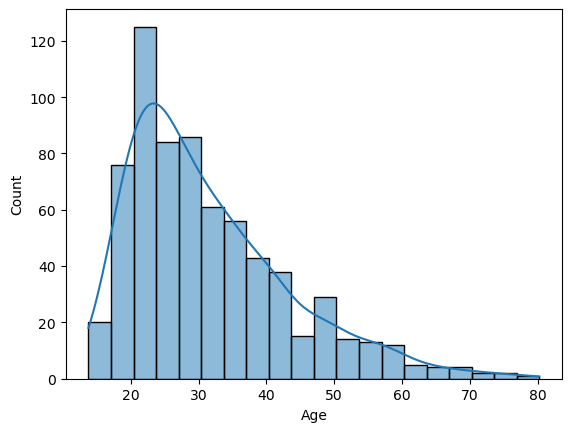

In [24]:
#The histogram for the Age column can be plotted using the below line of code
sns.histplot(df.Age,kde=True)

We could see that ages from 20-40 tend to apply for more credit cards

<Axes: xlabel='YearsEmployed', ylabel='Count'>

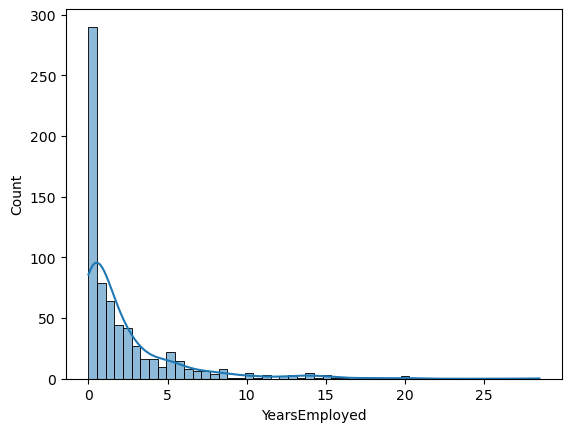

In [25]:
sns.histplot(df.YearsEmployed,kde=True)

The above histogram shows that people tend to apply for credit cards at a very early stage of their careers. The lower frequency in the region above 10 YOE may be due to the reason that people apply for credit cards in an early stage of their careers.

In [33]:
df['Gender'].unique()

array([1, 0], dtype=int64)

#Univariate Analysis of Categorical Variables

<Axes: xlabel='Gender', ylabel='count'>

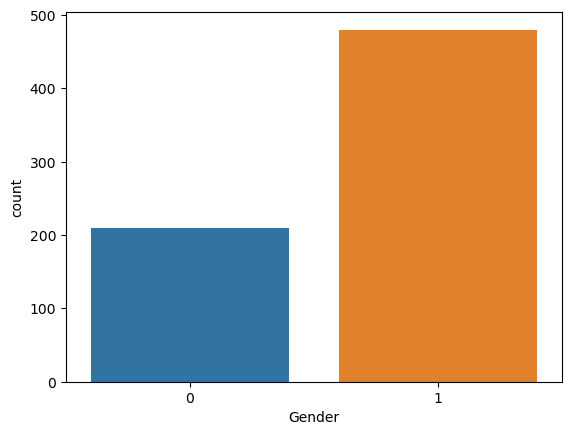

In [45]:
# plot count plot for the gender column
sns.countplot(x="Gender", data=df)

we can see that Male population applied  for credit card more than female population

<Axes: xlabel='Married', ylabel='count'>

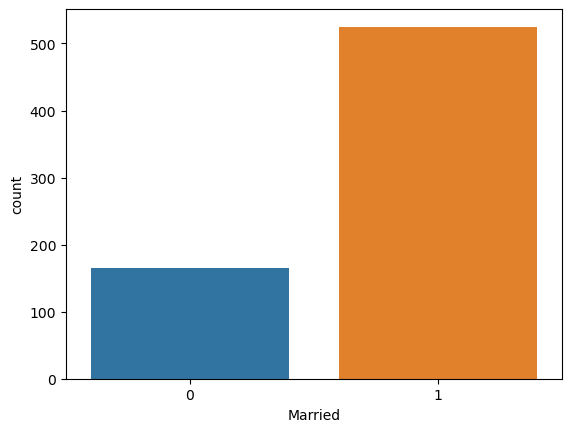

In [46]:
# plot count plot for the Married column
sns.countplot(x='Married',data = df)

We can see that Married people applied to credit cards

<Axes: xlabel='BankCustomer', ylabel='count'>

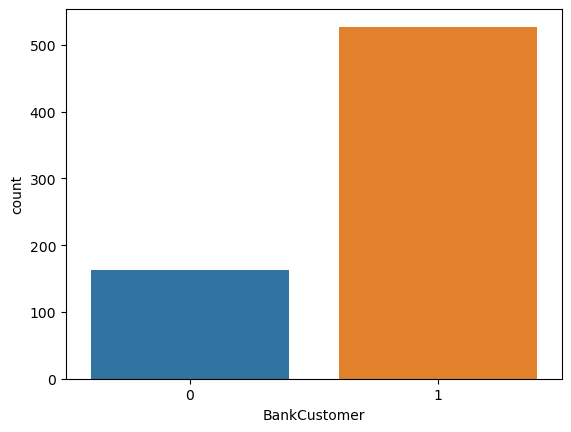

In [47]:
sns.countplot(x='BankCustomer',data=df)

People having bank accounts applied more than people who don’t have bank accounts. This cause no surprise.

<Axes: xlabel='Ethnicity', ylabel='count'>

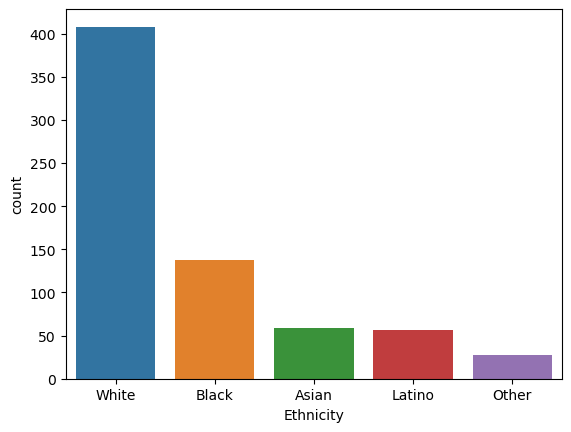

In [48]:
sns.countplot(x='Ethnicity',data=df)

The trend in ethnicit ymight be due to the region the data was collected from.

<Axes: xlabel='Approved', ylabel='count'>

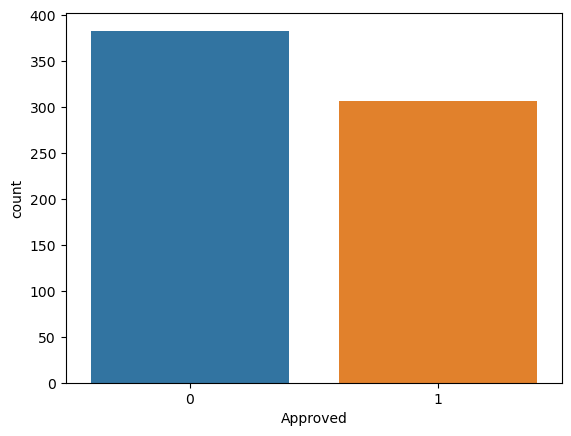

In [49]:
sns.countplot(x='Approved',data=df)

The majority of applications were rejected, i.e., less than 50% of the applications were approved.

In [44]:
df.dtypes

Gender            category
Age                float64
Debt               float64
Married              int64
BankCustomer         int64
Industry            object
Ethnicity           object
YearsEmployed      float64
PriorDefault         int64
Employed             int64
CreditScore          int64
DriversLicense       int64
Citizen             object
ZipCode              int64
Income               int64
Approved             int64
dtype: object

Bivariate Analysis of Continuous Variables:

In [50]:
df[['Age','Debt','YearsEmployed','CreditScore','Income']].corr()

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.202177,0.391464,0.187327,0.018719
Debt,0.202177,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.391464,0.298902,1.000000,0.322330,0.051345
CreditScore,0.187327,0.271207,0.322330,1.000000,0.063692
Income,0.018719,0.123121,0.051345,0.063692,1.000000


We can also draw line plots and scatterplots to see a relation between the two continuous variables.

<Axes: xlabel='YearsEmployed', ylabel='Income'>

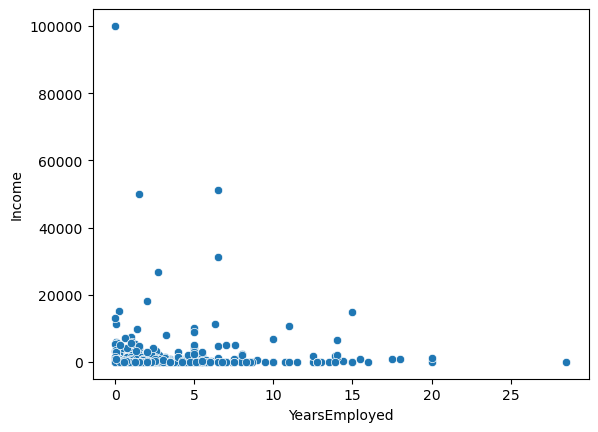

In [51]:
sns.scatterplot(x='YearsEmployed',y='Income',data=df)

The points in the above scatter plot don’t follow any specific pattern. This might be due to people applying for cards coming from different professions with varying payscales.

Bivariate Analysis of Categorical Variables vs Continuous Variables:

We will use the ‘Approved’ column of the data as the categorical variable for our analysis. Comparing the column ‘Approved’ column with other columns can provide us with some useful insights.

In [53]:
df.groupby(by='Approved').agg('mean')[['Age','Debt','YearsEmployed','CreditScore','Income']]

C:\Users\tejas\AppData\Local\Temp\ipykernel_27900\2189046732.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Approved').agg('mean')[['Age','Debt','YearsEmployed','CreditScore','Income']]


,Age,Debt,YearsEmployed,CreditScore,Income
Approved,,,,,
0,29.773029,3.839948,1.257924,0.631854,198.605744
1,33.686221,5.904951,3.427899,4.605863,2038.859935


In the above table, we can see that the average credit score of people who got approval is more than people who didn’t get approval. The same pattern is observed for the Income and YearEmployed columns. This is very understandable because companies don’t issue credit cards to people with low credit scores and low income. Also, companies prefer decent employment history for issuing credit cards.

We will plot KDE plots of continius variables with hue=’Approved’

<Axes: xlabel='Age', ylabel='Density'>

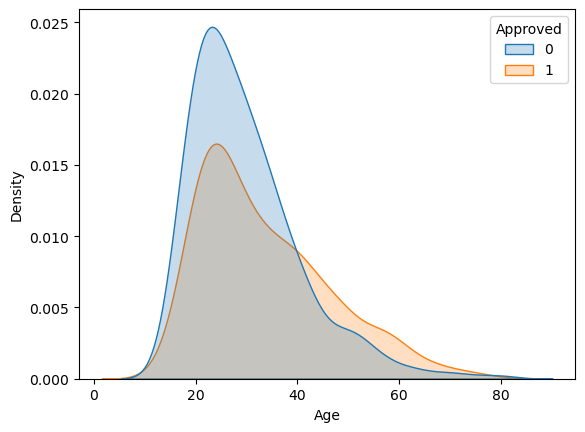

In [55]:
sns.kdeplot(data=df,x='Age',hue='Approved',fill=True)

Similarly, we can plot KDE plots for CreditScore and YearsEmployed Columns.

<Axes: xlabel='CreditScore', ylabel='Density'>

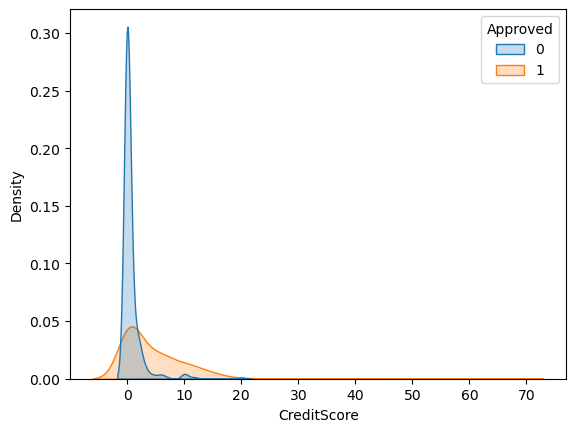

In [56]:
sns.kdeplot(data=df,x='CreditScore',hue='Approved',fill=True)

<Axes: xlabel='YearsEmployed', ylabel='Density'>

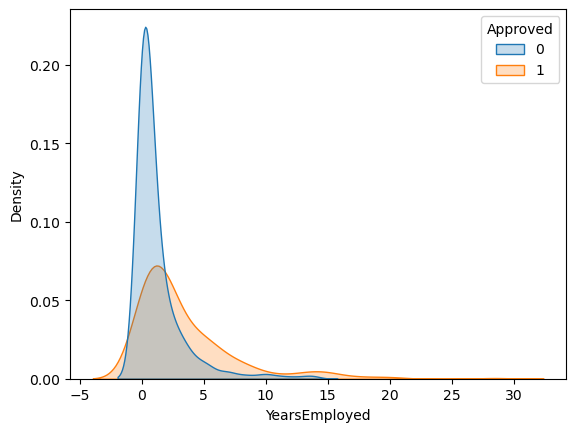

In [57]:
sns.kdeplot(data=df,x='YearsEmployed',hue='Approved',fill=True)

In the above plots, we can see how the distribution of variables behaves separately for the “Approved‘ and ‘Rejected’ cases.

Bivariate Analysis of Categorical Variables vs Categorical Variables:

<Axes: xlabel='Approved', ylabel='count'>

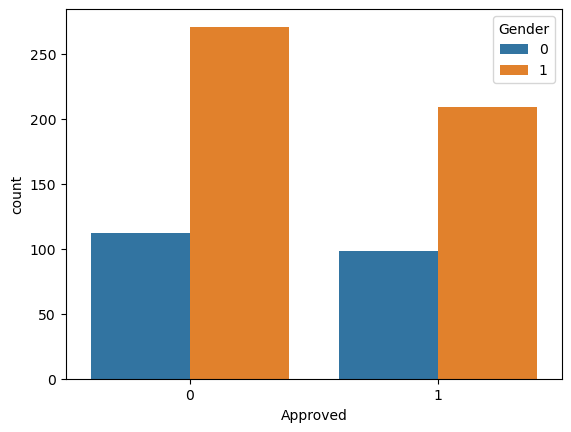

In [58]:
# countplot of Approved with Gender
sns.countplot(data=df,x='Approved',hue='Gender')

By looking at the above plot, it does not seem that the Gender of applicants is considered a criterion to approve application

We can also plot a contingency table to get the actual numbers

In [59]:
pd.crosstab(df.Gender,df.Approved,margins=True)

Approved,0,1,All
Gender,,,
0,112,98,210
1,271,209,480
All,383,307,690


To see the percentages we can run the code shown below

In [63]:
all=pd.crosstab(df.Gender,df.Approved,margins=True)['All']
pd.crosstab(df.Gender,df.Approved).divide(all,axis=0).dropna()

Approved,0,1
Gender,,
0,0.533333,0.466667
1,0.564583,0.435417


In [65]:
# Step 1: Calculate the total count for each 'Gender'
all = pd.crosstab(df.Gender, df.Approved, margins=True)['All']
all

Gender
0      210
1      480
All    690
Name: All, dtype: int64

In [66]:
# Step 2: Perform cross-tabulation for 'Gender' and 'Approved'
cross_tab = pd.crosstab(df.Gender, df.Approved)
cross_tab

Approved,0,1
Gender,,
0,112,98
1,271,209


In [68]:
conditional_probabilities = cross_tab.divide(all, axis=0).dropna()
conditional_probabilities

Approved,0,1
Gender,,
0,0.533333,0.466667
1,0.564583,0.435417


<Axes: xlabel='Ethnicity', ylabel='count'>

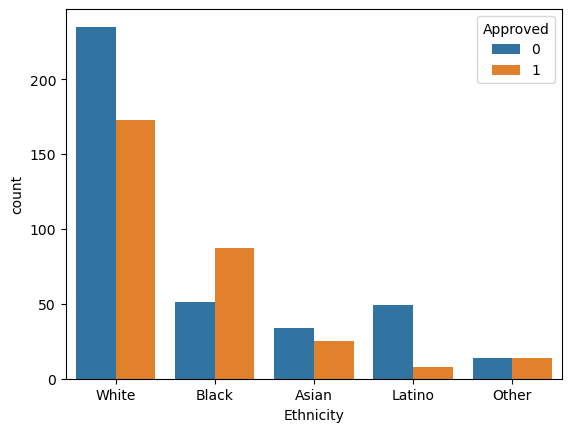

In [69]:
sns.countplot(data=df,x='Ethnicity',hue='Approved')

<Axes: xlabel='Employed', ylabel='count'>

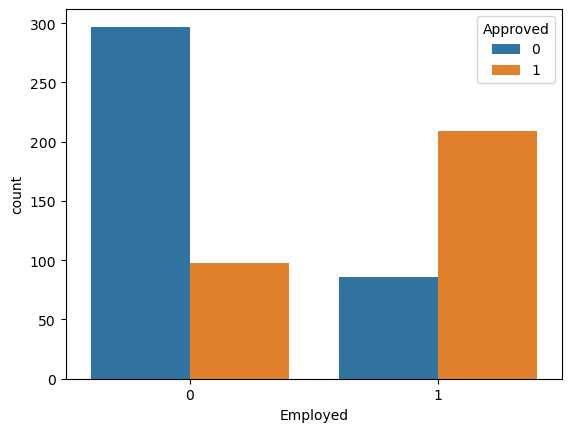

In [70]:
sns.countplot(data=df,x='Employed',hue='Approved')

<Axes: xlabel='BankCustomer', ylabel='count'>

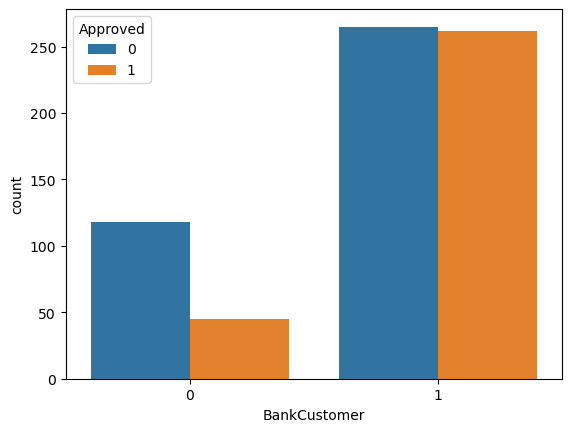

In [71]:
sns.countplot(data=df,x='BankCustomer',hue='Approved')

In the first countplot of the above three, we see that for the ‘Latino’ Ethnicity, most of the applications were rejected. So was there any discrimination against them? Let’s try to find out.

First we apply group by operation on the data.

In [73]:
df.groupby(by='Approved').agg('mean')[['Age','Debt','YearsEmployed','CreditScore','Income']]

C:\Users\tejas\AppData\Local\Temp\ipykernel_27900\2189046732.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Approved').agg('mean')[['Age','Debt','YearsEmployed','CreditScore','Income']]


,Age,Debt,YearsEmployed,CreditScore,Income
Approved,,,,,
0,29.773029,3.839948,1.257924,0.631854,198.605744
1,33.686221,5.904951,3.427899,4.605863,2038.859935


Then we filter the rows with Ethinicity = Latino and take mean of the required column values.

In [74]:
df[df.Ethnicity=='Latino'][['Age','Debt','YearsEmployed','CreditScore','Income']].agg('mean')

Age               38.024386
Debt               5.377105
YearsEmployed      1.406316
CreditScore        1.859649
Income           434.649123
dtype: float64

Now if we compare the mean CreditScore of Latino ethnicity (1.85)with the mean CreditScore of overall Approved applications (4.60), we find that Latino had less CreditScore than the population with approved applications. The same can be seen in Income column, where Latino has avg. income of 434.64 where the approved applications have avg. income above 2000. By this observation, we can say that it is very unlikely there was any discrimination against the Latino group. discrimination against them? Let’s try to find out.

Multivariate Analysis

Relations between continuous variables and Approved column

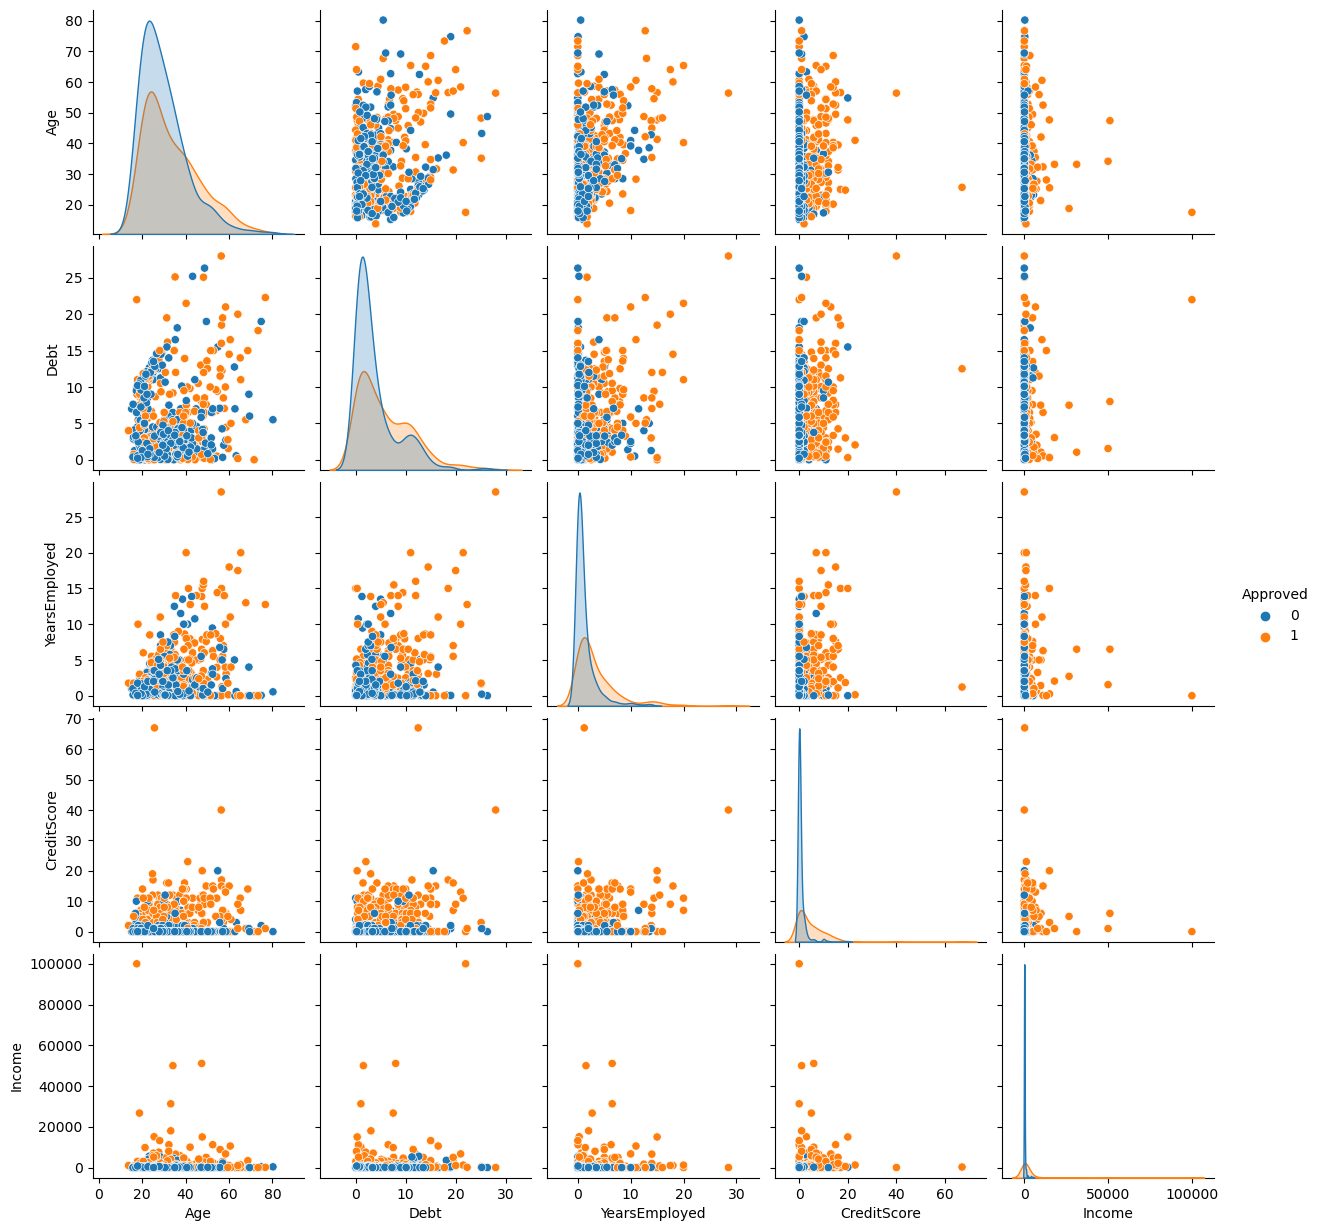

In [75]:
sns.pairplot(data=df[['Age','Debt','YearsEmployed','CreditScore','Income','Approved']],hue='Approved')

We don’t see any pattern in the pair plot